In [ ]:
pip install census

In [ ]:
pip install us

In [178]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import sklearn.datasets as dta
import scipy.stats as st

from census import Census
import gmaps
import csv

# Census & gmaps API Keys
from api_keys_census import (census_api, gkey)
c = Census(census_api, year=2020)

# Configure gmaps
gmaps.configure(api_key=gkey)

# State FIPS codes
# This is where you're going to import the FIPS codes from States.csv
states_df = pd.read_csv('resources/States.csv')

In [199]:
census_data_Highest = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Highest = pd.DataFrame(census_data_Highest)
# census_pd_Highest['respondantTotal'] = census_pd_Highest.sum(axis=1, numeric_only= True)
census_pd_Highest = census_pd_Highest.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })

census_pd_Highest['Pecentage of respondants living in poverty'] = (census_pd_Highest["Total living in poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])
census_pd_Highest['Pecentage of respondants living above poverty'] = (census_pd_Highest["Total living above poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])

census_pd_Highest.loc[:, 'Pecentage of respondants living in poverty'] = census_pd_Highest['Pecentage of respondants living in poverty'].map('{:.2%}'.format)
census_pd_Highest.loc[:, 'Pecentage of respondants living above poverty'] = census_pd_Highest['Pecentage of respondants living above poverty'].map('{:.2%}'.format)

census_pd_Highest

,Total living in poverty,Total living above poverty,Total Respondants,Zip Code,Pecentage of respondants living in poverty,Pecentage of respondants living above poverty
0,16652.0,22252.0,52480.0,19104,31.73%,42.40%
1,13049.0,44800.0,64728.0,10027,20.16%,69.21%
2,5012.0,21058.0,26837.0,91103,18.68%,78.47%
3,14934.0,28283.0,46621.0,60637,32.03%,60.67%
4,13792.0,22640.0,42380.0,90007,32.54%,53.42%
5,3982.0,23917.0,29080.0,63130,13.69%,82.25%
6,6116.0,16743.0,23415.0,27701,26.12%,71.51%
7,5492.0,29510.0,41386.0,60201,13.27%,71.30%
8,26616.0,56332.0,85893.0,10458,30.99%,65.58%
9,2397.0,19417.0,23034.0,10012,10.41%,84.30%


In [200]:
Universities_df['Zip Code']=Universities_df['Zip Code'].astype(int)
census_pd_Highest['Zip Code']=census_pd_Highest['Zip Code'].astype(int)

highest_merge = census_pd_Highest.merge(Universities_df, on="Zip Code", how='left')

highest_merge

,Total living in poverty,Total living above poverty,Total Respondants,Zip Code,Pecentage of respondants living in poverty,Pecentage of respondants living above poverty,University,Lat,Lng
0,16652.0,22252.0,52480.0,19104,31.73%,42.40%,University of Pennsylvania,39.964046,-75.197184
1,13049.0,44800.0,64728.0,10027,20.16%,69.21%,Colombia University,40.812908,-73.953194
2,5012.0,21058.0,26837.0,91103,18.68%,78.47%,California Institute of Technology,34.167659,-118.169566
3,14934.0,28283.0,46621.0,60637,32.03%,60.67%,University of Chicago,41.780393,-87.596954
4,13792.0,22640.0,42380.0,90007,32.54%,53.42%,USC,34.026540,-118.282786
5,3982.0,23917.0,29080.0,63130,13.69%,82.25%,Washington University,38.665788,-90.322240
6,6116.0,16743.0,23415.0,27701,26.12%,71.51%,Duke,35.995918,-78.902135
7,5492.0,29510.0,41386.0,60201,13.27%,71.30%,Northwestern University,42.056292,-87.701609
8,26616.0,56332.0,85893.0,10458,30.99%,65.58%,Fordham University,40.864942,-73.884878
9,2397.0,19417.0,23034.0,10012,10.41%,84.30%,NYU,40.725568,-73.998208


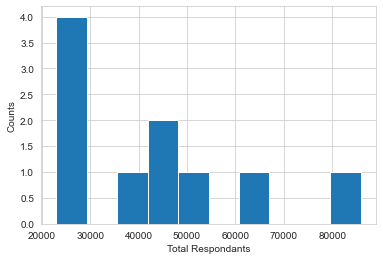

43585.4
41883.0
0    23034.0
1    23415.0
2    26837.0
3    29080.0
4    41386.0
5    42380.0
6    46621.0
7    52480.0
8    64728.0
9    85893.0
Name: Total Respondants, dtype: float64


In [223]:
plt.hist(highest_merge['Total Respondants'])
plt.xlabel('Total Respondants')
plt.ylabel('Counts')
plt.show()
print(highest_merge['Total Respondants'].mean())
print(highest_merge['Total Respondants'].median())
print(highest_merge['Total Respondants'].mode())

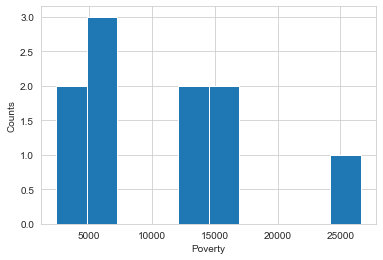

NormaltestResult(statistic=1.24504358868912, pvalue=0.536589561431805)


C:\Users\wesan\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [224]:
plt.hist(highest_merge['Total living in poverty'])
plt.xlabel('Poverty')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(highest_merge["Total living in poverty"].sample(9)))

In [221]:
quartiles = highest_merge['Total Respondants'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_Total Respondants = highest_merge.loc[(highest_merge['Total Respondants'] < lower_bound) | (highest_merge['Total Respondants'] > upper_bound)]
outlier_Total Respondants

SyntaxError: invalid syntax (4148155543.py, line 16)

C:\Users\wesan\AppData\Local\Temp\ipykernel_18124\132638312.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


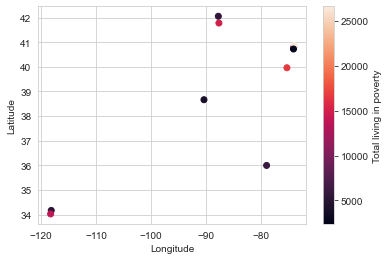

In [215]:
plt.scatter(highest_merge['Lng'],highest_merge['Lat'],c=highest_merge['Total living in poverty'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Total living in poverty")
plt.show()

In [202]:
University = ["UC", "CU", "NWU", "NYU", "USC", "Penn", "Duke", "UW", "FU", "Caltech"]
In_Poverty = [32.03, 20.16, 13.27, 10.41, 32.54, 31.73, 26.12, 13.69, 30.99, 18.68]
x_axis = np.arange(len(In_Poverty))

Text(0, 0.5, '% of Respondants In Poverty')

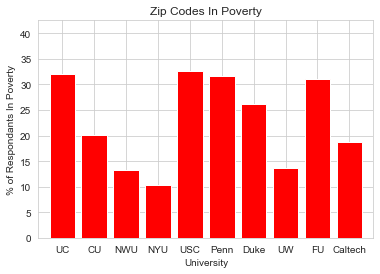

In [203]:
plt.bar(x_axis, In_Poverty, color="r", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, University)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(In_Poverty)+10)
plt.title("Zip Codes In Poverty")
plt.xlabel("University")
plt.ylabel("% of Respondants In Poverty")

In [204]:
University = ["UC", "CU", "NWU", "NYU", "USC", "Penn", "Duke", "UW", "FU", "Caltech"]
Above_Poverty = [60.67, 69.21, 71.30, 84.30, 53.42, 42.40, 71.51, 82.25, 65.58, 78.47]
x_axis = np.arange(len(In_Poverty))

Text(0, 0.5, '% of Respondants Above Poverty')

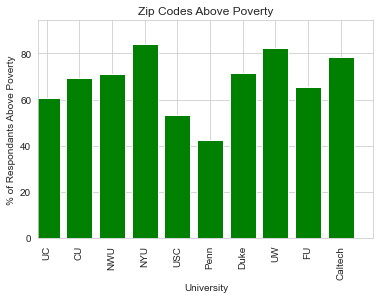

In [205]:
plt.bar(x_axis, Above_Poverty, color="g", align="center")
plt.xticks(tick_locations, University, rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(Above_Poverty)+10)
plt.title("Zip Codes Above Poverty")
plt.xlabel("University")
plt.ylabel("% of Respondants Above Poverty")

In [206]:
University = ["UC", "CU", "NWU", "NYU", "USC", "Penn", "Duke", "UW", "FU", "Caltech"]
Total_Respondants = [46621, 64728, 41386, 23034, 42380, 52480, 23415, 29080, 85893, 26837]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0,0,0,0.2,0,0,0,0,0,0)

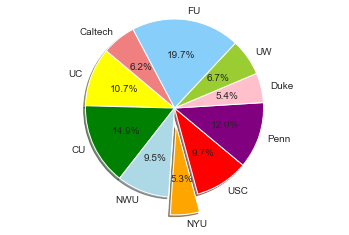

In [207]:
plt.pie(Total_Respondants, explode=explode, labels=University, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()

Text(0, 0.5, 'Percentage of Poverty Level')

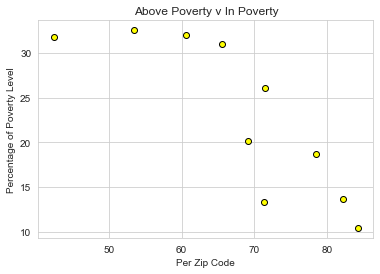

In [208]:
Above_Poverty = [60.67, 69.21, 71.30, 84.30, 53.42, 42.40, 71.51, 82.25, 65.58, 78.47]
In_Poverty = [32.03, 20.16, 13.27, 10.41, 32.54, 31.73, 26.12, 13.69, 30.99, 18.68]
plt.scatter(Above_Poverty, In_Poverty, marker="o", facecolors="Yellow", edgecolors="black")
plt.title("Above Poverty v In Poverty")
plt.xlabel("Per Zip Code")
plt.ylabel("Percentage of Poverty Level")


In [209]:
print(f"The correlation coefficient between Above Poverty and In Poverty is {round(st.pearsonr(Above_Poverty,In_Poverty)[0],2)}")

The correlation coefficient between Above Poverty and In Poverty is -0.83


In [210]:
Poverty_corr = highest_merge.corr()
Poverty_corr.unstack().sort_values()

Zip Code                    Lng                          -0.938134
Lng                         Zip Code                     -0.938134
Lat                         Zip Code                     -0.582444
Zip Code                    Lat                          -0.582444
Total living above poverty  Zip Code                     -0.415492
Zip Code                    Total living above poverty   -0.415492
                            Total Respondants            -0.412717
Total Respondants           Zip Code                     -0.412717
Total living in poverty     Zip Code                     -0.303084
Zip Code                    Total living in poverty      -0.303084
Total living in poverty     Lng                           0.229404
Lng                         Total living in poverty       0.229404
Lat                         Total living in poverty       0.236142
Total living in poverty     Lat                           0.236142
Total Respondants           Lng                           0.35

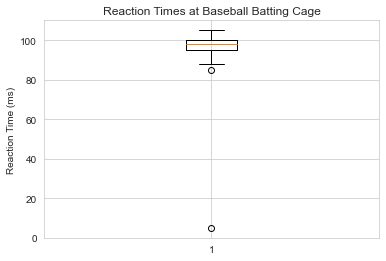

In [211]:
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()

In [194]:
# 60637:University of Chicago
# 10027:Colombia University
# 60201:Northwestern University
# 10012:NYU
# 90007:USC
# 19104:University of Pennsylvania
# 27701:Duke
# 63130:Washington University
# 10458:Fordham University
# 91103:California Institute of Technology

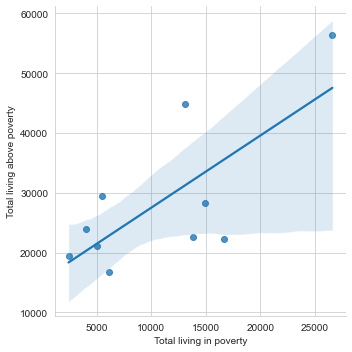

In [195]:
sns.set_style('whitegrid')
sns.lmplot(x ='Total living in poverty', y ='Total living above poverty', data = census_pd_Highest)

In [150]:
#c_variablesLink = "http://api.census.gov/data/2020/acs/acs5/variables.json"
#variablesData = requests.get(c_variablesLink).json()
#variables_pd = pd.DataFrame(variablesData)
# print(variables_pd)
#variables_pd.to_csv('variabledata.csv')

In [4]:
# print(states_df.loc("code",0))

# print (states_df.query('Code" == "0"')["Abbreviation"])
# states_df.query('Code == 1')['Abbreviation']

# states_df

In [49]:
census_data_Highest = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Highest = pd.DataFrame(census_data_Highest)
# census_pd_Highest['respondantTotal'] = census_pd_Highest.sum(axis=1, numeric_only= True)
census_pd_Highest = census_pd_Highest.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })

census_pd_Highest['Respondents % in poverty'] = (census_pd_Highest["Total living in poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])
census_pd_Highest['Respondents % above poverty'] = (census_pd_Highest["Total living above poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])

census_pd_Highest.loc[:, 'Respondents % in poverty'] = census_pd_Highest['Respondents % in poverty'].map('{:.2%}'.format)
census_pd_Highest.loc[:, 'Respondents % above poverty'] = census_pd_Highest['Respondents % above poverty'].map('{:.2%}'.format)

census_pd_Highest = census_pd_Highest[[
"Zip Code","Total Respondants",
'Respondents % in poverty',
'Respondents % above poverty',
"Total living in poverty",
"Total living above poverty"
]]
census_pd_Highest

,Zip Code,Total Respondants,Respondents % in poverty,Respondents % above poverty,Total living in poverty,Total living above poverty
0,19104,52480.0,31.73%,42.40%,16652.0,22252.0
1,10027,64728.0,20.16%,69.21%,13049.0,44800.0
2,91103,26837.0,18.68%,78.47%,5012.0,21058.0
3,60637,46621.0,32.03%,60.67%,14934.0,28283.0
4,90007,42380.0,32.54%,53.42%,13792.0,22640.0
5,63130,29080.0,13.69%,82.25%,3982.0,23917.0
6,27701,23415.0,26.12%,71.51%,6116.0,16743.0
7,60201,41386.0,13.27%,71.30%,5492.0,29510.0
8,10458,85893.0,30.99%,65.58%,26616.0,56332.0
9,10012,23034.0,10.41%,84.30%,2397.0,19417.0


In [50]:
census_data_Random = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Random = pd.DataFrame(census_data_Random)
#census_pd_Random['respondantTotal'] = census_pd_Random.sum(axis=1, numeric_only= True)
census_pd_Random = census_pd_Random.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })
census_pd_Random['Respondents % in poverty'] = (census_pd_Random["Total living in poverty"] 
                                                                   / census_pd_Random["Total Respondants"])
census_pd_Random['Respondents % above poverty'] = (census_pd_Random["Total living above poverty"] 
                                                                   / census_pd_Random["Total Respondants"])

census_pd_Random.loc[:, 'Respondents % in poverty'] = census_pd_Random['Respondents % in poverty'].map('{:.2%}'.format)
census_pd_Random.loc[:, 'Respondents % above poverty'] = census_pd_Random['Respondents % above poverty'].map('{:.2%}'.format)

census_pd_Random = census_pd_Random[[
"Zip Code","Total Respondants",
'Respondents % in poverty',
'Respondents % above poverty',
"Total living in poverty",
"Total living above poverty"
]]
census_pd_Random

,Zip Code,Total Respondants,Respondents % in poverty,Respondents % above poverty,Total living in poverty,Total living above poverty
0,98125,44030.0,10.51%,89.01%,4627.0,39193.0
1,32073,42153.0,10.36%,88.05%,4368.0,37115.0
2,07960,44998.0,6.29%,90.70%,2832.0,40815.0
3,29466,41466.0,2.62%,96.95%,1087.0,40200.0
4,96720,48647.0,15.91%,79.65%,7740.0,38747.0
5,98391,52686.0,4.10%,95.58%,2159.0,50357.0
6,90804,38151.0,19.65%,76.91%,7496.0,29341.0
7,27405,51160.0,26.79%,72.49%,13708.0,37087.0
8,77901,42620.0,23.16%,74.33%,9871.0,31680.0
9,33604,40309.0,22.01%,77.53%,8874.0,31251.0


In [5]:
Universities = {'University':['University of Chicago','Colombia University','Northwestern University','NYU','USC','University of Pennsylvania','Duke','Washington University','Fordham University','California Institute of Technology'],
                'Zip Code':[60637, 10027, 60201, 10012, 90007, 19104, 27701, 63130, 10458, 91103]}
Universities_df = pd.DataFrame(Universities)
Universities_df.dtypes

Universities_df

,University,Zip Code
0,University of Chicago,60637
1,Colombia University,10027
2,Northwestern University,60201
3,NYU,10012
4,USC,90007
5,University of Pennsylvania,19104
6,Duke,27701
7,Washington University,63130
8,Fordham University,10458
9,California Institute of Technology,91103


In [6]:
census_data_Highest = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Highest = pd.DataFrame(census_data_Highest)
# census_pd_Highest['respondantTotal'] = census_pd_Highest.sum(axis=1, numeric_only= True)
census_pd_Highest = census_pd_Highest.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })

census_pd_Highest['Pecentage of respondants living in poverty'] = (census_pd_Highest["Total living in poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])
census_pd_Highest['Pecentage of respondants living above poverty'] = (census_pd_Highest["Total living above poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])

census_pd_Highest.loc[:, 'Pecentage of respondants living in poverty'] = census_pd_Highest['Pecentage of respondants living in poverty'].map('{:.2%}'.format)
census_pd_Highest.loc[:, 'Pecentage of respondants living above poverty'] = census_pd_Highest['Pecentage of respondants living above poverty'].map('{:.2%}'.format)

census_pd_Highest

,Total living in poverty,Total living above poverty,Total Respondants,Zip Code,Pecentage of respondants living in poverty,Pecentage of respondants living above poverty
0,16652.0,22252.0,52480.0,19104,31.73%,42.40%
1,13049.0,44800.0,64728.0,10027,20.16%,69.21%
2,5012.0,21058.0,26837.0,91103,18.68%,78.47%
3,14934.0,28283.0,46621.0,60637,32.03%,60.67%
4,13792.0,22640.0,42380.0,90007,32.54%,53.42%
5,3982.0,23917.0,29080.0,63130,13.69%,82.25%
6,6116.0,16743.0,23415.0,27701,26.12%,71.51%
7,5492.0,29510.0,41386.0,60201,13.27%,71.30%
8,26616.0,56332.0,85893.0,10458,30.99%,65.58%
9,2397.0,19417.0,23034.0,10012,10.41%,84.30%


In [51]:
census_data_povGender_Highest = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_povGender_Highest = pd.DataFrame(census_data_povGender_Highest)



census_pd_povGender_Highest = census_pd_povGender_Highest.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Respondants" })
census_pd_povGender_Highest['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Highest['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Highest['Respondents % below poverty: Less than High School Graduate'] = (census_pd_povGender_Highest['Total below poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest['Respondents % below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest['Total below poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Respondents % below poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Total below poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Respondents % below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Total below poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])																   

census_pd_povGender_Highest['Respondents % Above poverty: Less than High School Graduate'] = (census_pd_povGender_Highest['Total Above poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest['Respondents % Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest['Total Above poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Respondents % Above poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Total Above poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Respondents % Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Total Above poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])

census_pd_povGender_Highest.loc[:, 'Respondents % below poverty: Less than High School Graduate'] = census_pd_povGender_Highest['Respondents % below poverty: Less than High School Graduate'].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, 'Respondents % below poverty: High school graduate (includes equivalency)'] = census_pd_povGender_Highest['Respondents % below poverty: High school graduate (includes equivalency)'].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, "Respondents % below poverty: Some college, associate's degree"] = census_pd_povGender_Highest["Respondents % below poverty: Some college, associate's degree"].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, "Respondents % below poverty: Some college, Bachelor's degree or higher"] = census_pd_povGender_Highest["Respondents % below poverty: Some college, Bachelor's degree or higher"].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, 'Respondents % Above poverty: Less than High School Graduate'] = census_pd_povGender_Highest['Respondents % Above poverty: Less than High School Graduate'].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, 'Respondents % Above poverty: High school graduate (includes equivalency)'] = census_pd_povGender_Highest['Respondents % Above poverty: High school graduate (includes equivalency)'].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, "Respondents % Above poverty: Some college, associate's degree"] = census_pd_povGender_Highest["Respondents % Above poverty: Some college, associate's degree"].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, "Respondents % Above poverty: Some college, Bachelor's degree or higher"] = census_pd_povGender_Highest["Respondents % Above poverty: Some college, Bachelor's degree or higher"].map('{:.2%}'.format)


census_pd_povGender_Highest = census_pd_povGender_Highest[[
"Zip Code","Total Respondants",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
"Total Above poverty: Less than High School Graduate",
"Total Above poverty: High school graduate (includes equivalency)",
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher",
'Respondents % below poverty: Less than High School Graduate',
'Respondents % below poverty: High school graduate (includes equivalency)',
"Respondents % below poverty: Some college, associate's degree",
"Respondents % below poverty: Some college, Bachelor's degree or higher",
'Respondents % Above poverty: Less than High School Graduate',
'Respondents % Above poverty: High school graduate (includes equivalency)',
"Respondents % Above poverty: Some college, associate's degree",
"Respondents % Above poverty: Some college, Bachelor's degree or higher"
]]

census_pd_povGender_Highest

,Zip Code,Total Respondants,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher",Respondents % below poverty: Less than High School Graduate,Respondents % below poverty: High school graduate (includes equivalency),"Respondents % below poverty: Some college, associate's degree","Respondents % below poverty: Some college, Bachelor's degree or higher",Respondents % Above poverty: Less than High School Graduate,Respondents % Above poverty: High school graduate (includes equivalency),"Respondents % Above poverty: Some college, associate's degree","Respondents % Above poverty: Some college, Bachelor's degree or higher"
0,19104,52480.0,1374.0,2501.0,1551.0,1445.0,1484.0,2950.0,2966.0,7712.0,2.62%,4.77%,2.96%,2.75%,2.83%,5.62%,5.65%,14.70%
1,10027,64728.0,2338.0,2229.0,1562.0,2159.0,2982.0,6372.0,5467.0,18577.0,3.61%,3.44%,2.41%,3.34%,4.61%,9.84%,8.45%,28.70%
2,91103,26837.0,1031.0,932.0,714.0,389.0,2596.0,3087.0,3311.0,6023.0,3.84%,3.47%,2.66%,1.45%,9.67%,11.50%,12.34%,22.44%
3,60637,46621.0,1669.0,2130.0,2884.0,1484.0,1626.0,4205.0,6238.0,8275.0,3.58%,4.57%,6.19%,3.18%,3.49%,9.02%,13.38%,17.75%
4,90007,42380.0,1817.0,991.0,819.0,1441.0,5432.0,2996.0,3059.0,3911.0,4.29%,2.34%,1.93%,3.40%,12.82%,7.07%,7.22%,9.23%
5,63130,29080.0,188.0,669.0,356.0,330.0,718.0,1997.0,3309.0,11428.0,0.65%,2.30%,1.22%,1.13%,2.47%,6.87%,11.38%,39.30%
6,27701,23415.0,1101.0,854.0,615.0,621.0,2146.0,1960.0,1925.0,6993.0,4.70%,3.65%,2.63%,2.65%,9.17%,8.37%,8.22%,29.87%
7,60201,41386.0,234.0,586.0,346.0,701.0,818.0,1611.0,2606.0,16198.0,0.57%,1.42%,0.84%,1.69%,1.98%,3.89%,6.30%,39.14%
8,10458,85893.0,5831.0,4018.0,2594.0,1142.0,10424.0,10520.0,10048.0,5568.0,6.79%,4.68%,3.02%,1.33%,12.14%,12.25%,11.70%,6.48%
9,10012,23034.0,378.0,136.0,151.0,980.0,448.0,956.0,1259.0,13583.0,1.64%,0.59%,0.66%,4.25%,1.94%,4.15%,5.47%,58.97%


In [52]:
census_data_povGender_Random = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_povGender_Random = pd.DataFrame(census_data_povGender_Random)



census_pd_povGender_Random = census_pd_povGender_Random.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Respondants" })
census_pd_povGender_Random['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Random['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Random['Respondents % below poverty: Less than High School Graduate'] = (census_pd_povGender_Random['Total below poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random['Respondents % below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random['Total below poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random["Respondents % below poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Total below poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random["Respondents % below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Total below poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Random["Total Respondants"])																   

census_pd_povGender_Random['Respondents % Above poverty: Less than High School Graduate'] = (census_pd_povGender_Random['Total Above poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random['Respondents % Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random['Total Above poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random["Respondents % Above poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Total Above poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random["Respondents % Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Total Above poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Random["Total Respondants"])

census_pd_povGender_Random.loc[:, 'Respondents % below poverty: Less than High School Graduate'] = census_pd_povGender_Random['Respondents % below poverty: Less than High School Graduate'].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, 'Respondents % below poverty: High school graduate (includes equivalency)'] = census_pd_povGender_Random['Respondents % below poverty: High school graduate (includes equivalency)'].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, "Respondents % below poverty: Some college, associate's degree"] = census_pd_povGender_Random["Respondents % below poverty: Some college, associate's degree"].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, "Respondents % below poverty: Some college, Bachelor's degree or higher"] = census_pd_povGender_Random["Respondents % below poverty: Some college, Bachelor's degree or higher"].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, 'Respondents % Above poverty: Less than High School Graduate'] = census_pd_povGender_Random['Respondents % Above poverty: Less than High School Graduate'].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, 'Respondents % Above poverty: High school graduate (includes equivalency)'] = census_pd_povGender_Random['Respondents % Above poverty: High school graduate (includes equivalency)'].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, "Respondents % Above poverty: Some college, associate's degree"] = census_pd_povGender_Random["Respondents % Above poverty: Some college, associate's degree"].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, "Respondents % Above poverty: Some college, Bachelor's degree or higher"] = census_pd_povGender_Random["Respondents % Above poverty: Some college, Bachelor's degree or higher"].map('{:.2%}'.format)


census_pd_povGender_Random = census_pd_povGender_Random[[
"Zip Code","Total Respondants",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
"Total Above poverty: Less than High School Graduate",
"Total Above poverty: High school graduate (includes equivalency)",
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher",
'Respondents % below poverty: Less than High School Graduate',
'Respondents % below poverty: High school graduate (includes equivalency)',
"Respondents % below poverty: Some college, associate's degree",
"Respondents % below poverty: Some college, Bachelor's degree or higher",
'Respondents % Above poverty: Less than High School Graduate',
'Respondents % Above poverty: High school graduate (includes equivalency)',
"Respondents % Above poverty: Some college, associate's degree",
"Respondents % Above poverty: Some college, Bachelor's degree or higher"
]]

census_pd_povGender_Random

,Zip Code,Total Respondants,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher",Respondents % below poverty: Less than High School Graduate,Respondents % below poverty: High school graduate (includes equivalency),"Respondents % below poverty: Some college, associate's degree","Respondents % below poverty: Some college, Bachelor's degree or higher",Respondents % Above poverty: Less than High School Graduate,Respondents % Above poverty: High school graduate (includes equivalency),"Respondents % Above poverty: Some college, associate's degree","Respondents % Above poverty: Some college, Bachelor's degree or higher"
0,98125,44030.0,679.0,507.0,699.0,1112.0,1511.0,3832.0,6756.0,17845.0,1.54%,1.15%,1.59%,2.53%,3.43%,8.70%,15.34%,40.53%
1,32073,42153.0,529.0,545.0,1044.0,262.0,2037.0,7472.0,10526.0,7206.0,1.25%,1.29%,2.48%,0.62%,4.83%,17.73%,24.97%,17.09%
2,07960,44998.0,310.0,443.0,273.0,699.0,1413.0,4062.0,4054.0,20492.0,0.69%,0.98%,0.61%,1.55%,3.14%,9.03%,9.01%,45.54%
3,29466,41466.0,159.0,150.0,139.0,318.0,742.0,3984.0,6698.0,15964.0,0.38%,0.36%,0.34%,0.77%,1.79%,9.61%,16.15%,38.50%
4,96720,48647.0,507.0,1819.0,1054.0,843.0,1442.0,7331.0,9424.0,10422.0,1.04%,3.74%,2.17%,1.73%,2.96%,15.07%,19.37%,21.42%
5,98391,52686.0,249.0,585.0,281.0,187.0,1405.0,8266.0,13957.0,9201.0,0.47%,1.11%,0.53%,0.35%,2.67%,15.69%,26.49%,17.46%
6,90804,38151.0,1606.0,1044.0,1256.0,459.0,4460.0,3664.0,6089.0,7067.0,4.21%,2.74%,3.29%,1.20%,11.69%,9.60%,15.96%,18.52%
7,27405,51160.0,1728.0,2428.0,2318.0,637.0,3636.0,7374.0,7751.0,6698.0,3.38%,4.75%,4.53%,1.25%,7.11%,14.41%,15.15%,13.09%
8,77901,42620.0,1533.0,1826.0,843.0,198.0,4573.0,6707.0,6799.0,3233.0,3.60%,4.28%,1.98%,0.46%,10.73%,15.74%,15.95%,7.59%
9,33604,40309.0,1440.0,2099.0,1202.0,481.0,2933.0,8339.0,6982.0,5296.0,3.57%,5.21%,2.98%,1.19%,7.28%,20.69%,17.32%,13.14%


In [53]:
census_data_Income_Highest = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Income_Highest = pd.DataFrame(census_data_Income_Highest)

census_pd_Income_Highest["Total below $50,000"] = (census_pd_Income_Highest["B19001_002E"]+census_pd_Income_Highest["B19001_003E"]+
census_pd_Income_Highest["B19001_004E"]+census_pd_Income_Highest["B19001_005E"]+
census_pd_Income_Highest["B19001_006E"]+census_pd_Income_Highest["B19001_007E"]+
census_pd_Income_Highest["B19001_008E"]+census_pd_Income_Highest["B19001_009E"]+
census_pd_Income_Highest["B19001_010E"])
census_pd_Income_Highest["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Highest["B19001_011E"]+census_pd_Income_Highest["B19001_012E"]+
census_pd_Income_Highest["B19001_013E"])
census_pd_Income_Highest["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Highest["B19001_014E"]+census_pd_Income_Highest["B19001_015E"])
census_pd_Income_Highest["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Highest["B19001_016E"]
census_pd_Income_Highest["Total above $\$$200,000"] =census_pd_Income_Highest["B19001_017E"]
census_pd_Income_Highest["Zip Code"] = census_pd_Income_Highest["zip code tabulation area"]
census_pd_Income_Highest["Total Responses"] = census_pd_Income_Highest["B01003_001E"]

census_pd_Income_Highest["% below $50,000"] = census_pd_Income_Highest["Total below $50,000"] / census_pd_Income_Highest["Total Responses"]
census_pd_Income_Highest["% from $\$$50,000 to $\$$99,999"] = census_pd_Income_Highest["Total from $\$$50,000 to $\$$99,999"] / census_pd_Income_Highest["Total Responses"]
census_pd_Income_Highest["% from $\$$100,000 to $\$$149,999"] = census_pd_Income_Highest["Total from $\$$100,000 to $\$$149,999"] / census_pd_Income_Highest["Total Responses"]
census_pd_Income_Highest["% from $\$$150,000 to $\$$199,999"] = census_pd_Income_Highest["Total from $\$$150,000 to $\$$199,999"] / census_pd_Income_Highest["Total Responses"]
census_pd_Income_Highest["% above $\$$200,000"] = census_pd_Income_Highest["Total above $\$$200,000"] / census_pd_Income_Highest["Total Responses"]

census_pd_Income_Highest.loc[:, '% below $50,000'] = census_pd_Income_Highest['% below $50,000'].map('{:.2%}'.format)
census_pd_Income_Highest.loc[:, "% from $\$$50,000 to $\$$99,999"] = census_pd_Income_Highest["% from $\$$50,000 to $\$$99,999"].map('{:.2%}'.format)
census_pd_Income_Highest.loc[:, "% from $\$$100,000 to $\$$149,999"] = census_pd_Income_Highest["% from $\$$100,000 to $\$$149,999"].map('{:.2%}'.format)
census_pd_Income_Highest.loc[:, "% from $\$$150,000 to $\$$199,999"] = census_pd_Income_Highest["% from $\$$150,000 to $\$$199,999"].map('{:.2%}'.format)
census_pd_Income_Highest.loc[:, "% above $\$$200,000"] = census_pd_Income_Highest["% above $\$$200,000"].map('{:.2%}'.format)

census_pd_Income_Highest = census_pd_Income_Highest[[
"Zip Code","Total Responses",
"% below $50,000",
"% from $\$$50,000 to $\$$99,999",
"% from $\$$100,000 to $\$$149,999",
"% from $\$$150,000 to $\$$199,999",
"% above $\$$200,000",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Highest

,Zip Code,Total Responses,"% below $50,000","% from $\$$50,000 to $\$$99,999","% from $\$$100,000 to $\$$149,999","% from $\$$150,000 to $\$$199,999","% above $\$$200,000","Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,19104,52480.0,21.79%,6.08%,2.18%,0.59%,0.83%,11433.0,3189.0,1142.0,308.0,436.0
1,10027,64728.0,16.98%,8.21%,5.21%,2.33%,4.10%,10988.0,5311.0,3371.0,1509.0,2656.0
2,91103,26837.0,12.43%,7.56%,4.94%,2.93%,3.76%,3337.0,2029.0,1326.0,785.0,1008.0
3,60637,46621.0,27.70%,8.71%,3.50%,1.20%,2.04%,12916.0,4062.0,1632.0,559.0,953.0
4,90007,42380.0,18.98%,6.80%,1.98%,0.58%,0.55%,8045.0,2882.0,840.0,247.0,234.0
5,63130,29080.0,15.80%,10.65%,5.62%,3.55%,6.72%,4594.0,3098.0,1634.0,1031.0,1953.0
6,27701,23415.0,24.33%,9.98%,4.60%,2.27%,3.05%,5696.0,2336.0,1076.0,532.0,714.0
7,60201,41386.0,13.34%,7.05%,5.36%,2.57%,8.00%,5519.0,2917.0,2220.0,1065.0,3311.0
8,10458,85893.0,20.78%,9.24%,2.27%,0.76%,0.37%,17851.0,7939.0,1947.0,650.0,318.0
9,10012,23034.0,12.60%,11.61%,10.13%,4.60%,15.65%,2902.0,2675.0,2333.0,1060.0,3604.0


In [54]:
census_data_Income_Random = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Income_Random = pd.DataFrame(census_data_Income_Random)

census_pd_Income_Random["Total below $50,000"] = (census_pd_Income_Random["B19001_002E"]+census_pd_Income_Random["B19001_003E"]+
census_pd_Income_Random["B19001_004E"]+census_pd_Income_Random["B19001_005E"]+
census_pd_Income_Random["B19001_006E"]+census_pd_Income_Random["B19001_007E"]+
census_pd_Income_Random["B19001_008E"]+census_pd_Income_Random["B19001_009E"]+
census_pd_Income_Random["B19001_010E"])
census_pd_Income_Random["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Random["B19001_011E"]+census_pd_Income_Random["B19001_012E"]+
census_pd_Income_Random["B19001_013E"])
census_pd_Income_Random["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Random["B19001_014E"]+census_pd_Income_Random["B19001_015E"])
census_pd_Income_Random["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Random["B19001_016E"]
census_pd_Income_Random["Total above $\$$200,000"] =census_pd_Income_Random["B19001_017E"]
census_pd_Income_Random["Zip Code"] = census_pd_Income_Random["zip code tabulation area"]
census_pd_Income_Random["Total Responses"] = census_pd_Income_Random["B01003_001E"]

census_pd_Income_Random["% below $50,000"] = census_pd_Income_Random["Total below $50,000"] / census_pd_Income_Random["Total Responses"]
census_pd_Income_Random["% from $\$$50,000 to $\$$99,999"] = census_pd_Income_Random["Total from $\$$50,000 to $\$$99,999"] / census_pd_Income_Random["Total Responses"]
census_pd_Income_Random["% from $\$$100,000 to $\$$149,999"] = census_pd_Income_Random["Total from $\$$100,000 to $\$$149,999"] / census_pd_Income_Random["Total Responses"]
census_pd_Income_Random["% from $\$$150,000 to $\$$199,999"] = census_pd_Income_Random["Total from $\$$150,000 to $\$$199,999"] / census_pd_Income_Random["Total Responses"]
census_pd_Income_Random["% above $\$$200,000"] = census_pd_Income_Random["Total above $\$$200,000"] / census_pd_Income_Random["Total Responses"]

census_pd_Income_Random.loc[:, '% below $50,000'] = census_pd_Income_Random['% below $50,000'].map('{:.2%}'.format)
census_pd_Income_Random.loc[:, "% from $\$$50,000 to $\$$99,999"] = census_pd_Income_Random["% from $\$$50,000 to $\$$99,999"].map('{:.2%}'.format)
census_pd_Income_Random.loc[:, "% from $\$$100,000 to $\$$149,999"] = census_pd_Income_Random["% from $\$$100,000 to $\$$149,999"].map('{:.2%}'.format)
census_pd_Income_Random.loc[:, "% from $\$$150,000 to $\$$199,999"] = census_pd_Income_Random["% from $\$$150,000 to $\$$199,999"].map('{:.2%}'.format)
census_pd_Income_Random.loc[:, "% above $\$$200,000"] = census_pd_Income_Random["% above $\$$200,000"].map('{:.2%}'.format)

census_pd_Income_Random = census_pd_Income_Random[[
"Zip Code","Total Responses",
"% below $50,000",
"% from $\$$50,000 to $\$$99,999",
"% from $\$$100,000 to $\$$149,999",
"% from $\$$150,000 to $\$$199,999",
"% above $\$$200,000",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Random

,Zip Code,Total Responses,"% below $50,000","% from $\$$50,000 to $\$$99,999","% from $\$$100,000 to $\$$149,999","% from $\$$150,000 to $\$$199,999","% above $\$$200,000","Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,98125,44030.0,14.04%,13.17%,7.84%,4.44%,5.13%,6180.0,5800.0,3450.0,1956.0,2257.0
1,32073,42153.0,13.50%,12.91%,6.13%,2.50%,0.78%,5691.0,5440.0,2584.0,1052.0,327.0
2,07960,44998.0,7.18%,7.74%,6.13%,5.43%,12.88%,3229.0,3484.0,2759.0,2443.0,5797.0
3,29466,41466.0,8.23%,6.75%,7.55%,4.27%,8.49%,3412.0,2798.0,3132.0,1769.0,3521.0
4,96720,48647.0,13.74%,10.97%,5.68%,3.04%,1.72%,6686.0,5338.0,2764.0,1477.0,836.0
5,98391,52686.0,5.42%,10.45%,9.32%,4.60%,4.38%,2857.0,5504.0,4909.0,2425.0,2308.0
6,90804,38151.0,18.41%,12.85%,5.19%,1.62%,1.32%,7022.0,4901.0,1981.0,618.0,505.0
7,27405,51160.0,23.48%,9.54%,3.63%,0.62%,0.56%,12012.0,4883.0,1859.0,316.0,287.0
8,77901,42620.0,18.42%,10.54%,3.74%,1.00%,0.53%,7849.0,4491.0,1593.0,427.0,224.0
9,33604,40309.0,21.67%,12.02%,3.51%,1.14%,0.88%,8735.0,4847.0,1414.0,460.0,355.0


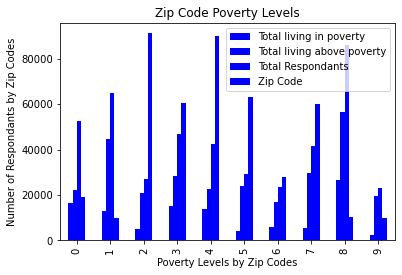

<Figure size 432x288 with 0 Axes>

In [10]:
highest_merge.plot(kind = "bar", color ="Blue", align="center")
plt.title("Zip Code Poverty Levels")
plt.ylabel("Number of Respondants by Zip Codes")
plt.xlabel("Poverty Levels by Zip Codes")
plt.show()
plt.tight_layout()

In [13]:
census_data_Random = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Random = pd.DataFrame(census_data_Random)
#census_pd_Random['respondantTotal'] = census_pd_Random.sum(axis=1, numeric_only= True)
census_pd_Random = census_pd_Random.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })
census_pd_Random['Pecentage of respondants living in poverty'] = (census_pd_Random["Total living in poverty"] 
                                                                   / census_pd_Random["Total Respondants"])
census_pd_Random['Pecentage of respondants living above poverty'] = (census_pd_Random["Total living above poverty"] 
                                                                   / census_pd_Random["Total Respondants"])

census_pd_Random.loc[:, 'Pecentage of respondants living in poverty'] = census_pd_Random['Pecentage of respondants living in poverty'].map('{:.2%}'.format)
census_pd_Random.loc[:, 'Pecentage of respondants living above poverty'] = census_pd_Random['Pecentage of respondants living above poverty'].map('{:.2%}'.format)

census_pd_Random

,Total living in poverty,Total living above poverty,Total Respondants,Zip Code,Pecentage of respondants living in poverty,Pecentage of respondants living above poverty
0,4627.0,39193.0,44030.0,98125,10.51%,89.01%
1,4368.0,37115.0,42153.0,32073,10.36%,88.05%
2,2832.0,40815.0,44998.0,07960,6.29%,90.70%
3,1087.0,40200.0,41466.0,29466,2.62%,96.95%
4,7740.0,38747.0,48647.0,96720,15.91%,79.65%
5,2159.0,50357.0,52686.0,98391,4.10%,95.58%
6,7496.0,29341.0,38151.0,90804,19.65%,76.91%
7,13708.0,37087.0,51160.0,27405,26.79%,72.49%
8,9871.0,31680.0,42620.0,77901,23.16%,74.33%
9,8874.0,31251.0,40309.0,33604,22.01%,77.53%


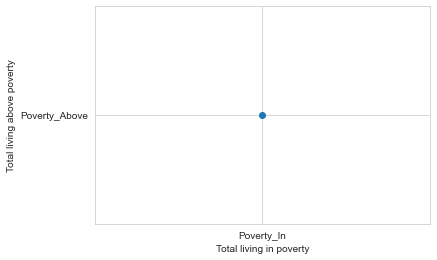

In [137]:
Poverty_In = census_pd_Random [ 'Total living in poverty']
Poverty_Above = census_pd_Random [ 'Total living above poverty']
plt.scatter('Poverty_In','Poverty_Above')
plt.xlabel("Total living in poverty")
plt.ylabel("Total living above poverty")
plt.show()

In [125]:
census_data_povGender_Highest = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_povGender_Highest = pd.DataFrame(census_data_povGender_Highest)



census_pd_povGender_Highest = census_pd_povGender_Highest.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Respondants" })
census_pd_povGender_Highest['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Highest['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Highest['Pecentage of respondants below poverty: Less than High School Graduate'] = (census_pd_povGender_Highest['Total below poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest['Pecentage of respondants below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest['Total below poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Pecentage of respondants below poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Total below poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Pecentage of respondants below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Total below poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])																   

census_pd_povGender_Highest['Pecentage of respondants Above poverty: Less than High School Graduate'] = (census_pd_povGender_Highest['Total Above poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest['Pecentage of respondants Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest['Total Above poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Pecentage of respondants Above poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Total Above poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Pecentage of respondants Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Total Above poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])

census_pd_povGender_Highest = census_pd_povGender_Highest[[
"Zip Code","Total Respondants",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
"Total Above poverty: Less than High School Graduate",
"Total Above poverty: High school graduate (includes equivalency)",
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher",
'Pecentage of respondants Above poverty: Less than High School Graduate',
'Pecentage of respondants Above poverty: High school graduate (includes equivalency)',
"Pecentage of respondants Above poverty: Some college, associate's degree",
"Pecentage of respondants Above poverty: Some college, Bachelor's degree or higher"
]]

census_pd_povGender_Highest

,Zip Code,Total Respondants,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher",Pecentage of respondants Above poverty: Less than High School Graduate,Pecentage of respondants Above poverty: High school graduate (includes equivalency),"Pecentage of respondants Above poverty: Some college, associate's degree","Pecentage of respondants Above poverty: Some college, Bachelor's degree or higher"
0,19104,52480.0,1374.0,2501.0,1551.0,1445.0,1484.0,2950.0,2966.0,7712.0,0.028277,0.056212,0.056517,0.146951
1,10027,64728.0,2338.0,2229.0,1562.0,2159.0,2982.0,6372.0,5467.0,18577.0,0.046070,0.098443,0.084461,0.287001
2,91103,26837.0,1031.0,932.0,714.0,389.0,2596.0,3087.0,3311.0,6023.0,0.096732,0.115028,0.123374,0.224429
3,60637,46621.0,1669.0,2130.0,2884.0,1484.0,1626.0,4205.0,6238.0,8275.0,0.034877,0.090195,0.133802,0.177495
4,90007,42380.0,1817.0,991.0,819.0,1441.0,5432.0,2996.0,3059.0,3911.0,0.128174,0.070694,0.072180,0.092284
5,63130,29080.0,188.0,669.0,356.0,330.0,718.0,1997.0,3309.0,11428.0,0.024691,0.068673,0.113790,0.392985
6,27701,23415.0,1101.0,854.0,615.0,621.0,2146.0,1960.0,1925.0,6993.0,0.091651,0.083707,0.082212,0.298655
7,60201,41386.0,234.0,586.0,346.0,701.0,818.0,1611.0,2606.0,16198.0,0.019765,0.038926,0.062968,0.391388
8,10458,85893.0,5831.0,4018.0,2594.0,1142.0,10424.0,10520.0,10048.0,5568.0,0.121360,0.122478,0.116983,0.064825
9,10012,23034.0,378.0,136.0,151.0,980.0,448.0,956.0,1259.0,13583.0,0.019450,0.041504,0.054658,0.589693


In [15]:
census_data_povGender_Random = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_povGender_Random = pd.DataFrame(census_data_povGender_Random)



census_pd_povGender_Random = census_pd_povGender_Random.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Responses" })
census_pd_povGender_Random['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Random['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Random = census_pd_povGender_Random[[
"Zip Code",
"Total Responses",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
'Total Above poverty: Less than High School Graduate',
'Total Above poverty: High school graduate (includes equivalency)',
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher"
]]

census_pd_povGender_Random

,Zip Code,Total Responses,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher"
0,98125,44030.0,679.0,507.0,699.0,1112.0,1511.0,3832.0,6756.0,17845.0
1,32073,42153.0,529.0,545.0,1044.0,262.0,2037.0,7472.0,10526.0,7206.0
2,07960,44998.0,310.0,443.0,273.0,699.0,1413.0,4062.0,4054.0,20492.0
3,29466,41466.0,159.0,150.0,139.0,318.0,742.0,3984.0,6698.0,15964.0
4,96720,48647.0,507.0,1819.0,1054.0,843.0,1442.0,7331.0,9424.0,10422.0
5,98391,52686.0,249.0,585.0,281.0,187.0,1405.0,8266.0,13957.0,9201.0
6,90804,38151.0,1606.0,1044.0,1256.0,459.0,4460.0,3664.0,6089.0,7067.0
7,27405,51160.0,1728.0,2428.0,2318.0,637.0,3636.0,7374.0,7751.0,6698.0
8,77901,42620.0,1533.0,1826.0,843.0,198.0,4573.0,6707.0,6799.0,3233.0
9,33604,40309.0,1440.0,2099.0,1202.0,481.0,2933.0,8339.0,6982.0,5296.0


In [16]:
census_data_Income_Highest = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Income_Highest = pd.DataFrame(census_data_Income_Highest)

census_pd_Income_Highest["Total below $50,000"] = (census_pd_Income_Highest["B19001_002E"]+census_pd_Income_Highest["B19001_003E"]+
census_pd_Income_Highest["B19001_004E"]+census_pd_Income_Highest["B19001_005E"]+
census_pd_Income_Highest["B19001_006E"]+census_pd_Income_Highest["B19001_007E"]+
census_pd_Income_Highest["B19001_008E"]+census_pd_Income_Highest["B19001_009E"]+
census_pd_Income_Highest["B19001_010E"])
census_pd_Income_Highest["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Highest["B19001_011E"]+census_pd_Income_Highest["B19001_012E"]+
census_pd_Income_Highest["B19001_013E"])
census_pd_Income_Highest["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Highest["B19001_014E"]+census_pd_Income_Highest["B19001_015E"])
census_pd_Income_Highest["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Highest["B19001_016E"]
census_pd_Income_Highest["Total above $\$$200,000"] =census_pd_Income_Highest["B19001_017E"]
census_pd_Income_Highest["Zip Code"] = census_pd_Income_Highest["zip code tabulation area"]
census_pd_Income_Highest["Total Responses"] = census_pd_Income_Highest["B01003_001E"]

census_pd_Income_Highest = census_pd_Income_Highest[[
"Zip Code",
"Total Responses",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Highest

,Zip Code,Total Responses,"Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,19104,52480.0,11433.0,3189.0,1142.0,308.0,436.0
1,10027,64728.0,10988.0,5311.0,3371.0,1509.0,2656.0
2,91103,26837.0,3337.0,2029.0,1326.0,785.0,1008.0
3,60637,46621.0,12916.0,4062.0,1632.0,559.0,953.0
4,90007,42380.0,8045.0,2882.0,840.0,247.0,234.0
5,63130,29080.0,4594.0,3098.0,1634.0,1031.0,1953.0
6,27701,23415.0,5696.0,2336.0,1076.0,532.0,714.0
7,60201,41386.0,5519.0,2917.0,2220.0,1065.0,3311.0
8,10458,85893.0,17851.0,7939.0,1947.0,650.0,318.0
9,10012,23034.0,2902.0,2675.0,2333.0,1060.0,3604.0


In [17]:
census_data_Income_Random = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Income_Random = pd.DataFrame(census_data_Income_Random)

census_pd_Income_Random["Total below $50,000"] = (census_pd_Income_Random["B19001_002E"]+census_pd_Income_Random["B19001_003E"]+
census_pd_Income_Random["B19001_004E"]+census_pd_Income_Random["B19001_005E"]+
census_pd_Income_Random["B19001_006E"]+census_pd_Income_Random["B19001_007E"]+
census_pd_Income_Random["B19001_008E"]+census_pd_Income_Random["B19001_009E"]+
census_pd_Income_Random["B19001_010E"])
census_pd_Income_Random["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Random["B19001_011E"]+census_pd_Income_Random["B19001_012E"]+
census_pd_Income_Random["B19001_013E"])
census_pd_Income_Random["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Random["B19001_014E"]+census_pd_Income_Random["B19001_015E"])
census_pd_Income_Random["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Random["B19001_016E"]
census_pd_Income_Random["Total above $\$$200,000"] =census_pd_Income_Random["B19001_017E"]
census_pd_Income_Random["Zip Code"] = census_pd_Income_Random["zip code tabulation area"]
census_pd_Income_Random["Total Responses"] = census_pd_Income_Random["B01003_001E"]

census_pd_Income_Random = census_pd_Income_Random[[
"Zip Code",
"Total Responses",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Random

,Zip Code,Total Responses,"Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,98125,44030.0,6180.0,5800.0,3450.0,1956.0,2257.0
1,32073,42153.0,5691.0,5440.0,2584.0,1052.0,327.0
2,07960,44998.0,3229.0,3484.0,2759.0,2443.0,5797.0
3,29466,41466.0,3412.0,2798.0,3132.0,1769.0,3521.0
4,96720,48647.0,6686.0,5338.0,2764.0,1477.0,836.0
5,98391,52686.0,2857.0,5504.0,4909.0,2425.0,2308.0
6,90804,38151.0,7022.0,4901.0,1981.0,618.0,505.0
7,27405,51160.0,12012.0,4883.0,1859.0,316.0,287.0
8,77901,42620.0,7849.0,4491.0,1593.0,427.0,224.0
9,33604,40309.0,8735.0,4847.0,1414.0,460.0,355.0


In [18]:
print (census_pd_Income_Random["Total below $50,000"])
print(census_pd_Income_Random["Total Responses"])
print(census_pd_Income_Random["Total below $50,000"] / census_pd_Income_Random["Total Responses"])

0     6180.0
1     5691.0
2     3229.0
3     3412.0
4     6686.0
5     2857.0
6     7022.0
7    12012.0
8     7849.0
9     8735.0
Name: Total below $50,000, dtype: float64
0    44030.0
1    42153.0
2    44998.0
3    41466.0
4    48647.0
5    52686.0
6    38151.0
7    51160.0
8    42620.0
9    40309.0
Name: Total Responses, dtype: float64
0    0.140359
1    0.135008
2    0.071759
3    0.082284
4    0.137439
5    0.054227
6    0.184058
7    0.234793
8    0.184162
9    0.216701
dtype: float64


In [19]:
#c_variablesLink = "http://api.census.gov/data/2020/acs/acs5/variables.json"
#variablesData = requests.get(c_variablesLink).json()
#variables_pd = pd.DataFrame(variablesData)
# print(variables_pd)
#variables_pd.to_csv('variabledata.csv')

In [20]:
census_data_Highest = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Highest = pd.DataFrame(census_data_Highest)
# census_pd_Highest['respondantTotal'] = census_pd_Highest.sum(axis=1, numeric_only= True)
census_pd_Highest = census_pd_Highest.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })
census_pd_Highest

,Total living in poverty,Total living above poverty,Total Respondants,Zip Code
0,16652.0,22252.0,52480.0,19104
1,13049.0,44800.0,64728.0,10027
2,5012.0,21058.0,26837.0,91103
3,14934.0,28283.0,46621.0,60637
4,13792.0,22640.0,42380.0,90007
5,3982.0,23917.0,29080.0,63130
6,6116.0,16743.0,23415.0,27701
7,5492.0,29510.0,41386.0,60201
8,26616.0,56332.0,85893.0,10458
9,2397.0,19417.0,23034.0,10012


In [23]:
import seaborn as sns

In [25]:
census_data_Random = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Random = pd.DataFrame(census_data_Random)
#census_pd_Random['respondantTotal'] = census_pd_Random.sum(axis=1, numeric_only= True)
census_pd_Random = census_pd_Random.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })
census_pd_Random

,Total living in poverty,Total living above poverty,Total Respondants,Zip Code
0,4627.0,39193.0,44030.0,98125
1,4368.0,37115.0,42153.0,32073
2,2832.0,40815.0,44998.0,07960
3,1087.0,40200.0,41466.0,29466
4,7740.0,38747.0,48647.0,96720
5,2159.0,50357.0,52686.0,98391
6,7496.0,29341.0,38151.0,90804
7,13708.0,37087.0,51160.0,27405
8,9871.0,31680.0,42620.0,77901
9,8874.0,31251.0,40309.0,33604


In [27]:
# print(states_df.loc("code",0))

# print (states_df.query('Code" == "0"')["Abbreviation"])
# states_df.query('Code == 1')['Abbreviation']

# states_df


In [28]:
census_data_povGender_Highest = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_povGender_Highest = pd.DataFrame(census_data_povGender_Highest)



census_pd_povGender_Highest = census_pd_povGender_Highest.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Responses" })
census_pd_povGender_Highest['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Highest['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Highest = census_pd_povGender_Highest[[
"Zip Code","Total Responses",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
'Total Above poverty: Less than High School Graduate',
'Total Above poverty: High school graduate (includes equivalency)',
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher",
"Total Responses"
]]

census_pd_povGender_Highest

,Zip Code,Total Responses,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher",Total Responses
0,19104,52480.0,1374.0,2501.0,1551.0,1445.0,1484.0,2950.0,2966.0,7712.0,52480.0
1,10027,64728.0,2338.0,2229.0,1562.0,2159.0,2982.0,6372.0,5467.0,18577.0,64728.0
2,91103,26837.0,1031.0,932.0,714.0,389.0,2596.0,3087.0,3311.0,6023.0,26837.0
3,60637,46621.0,1669.0,2130.0,2884.0,1484.0,1626.0,4205.0,6238.0,8275.0,46621.0
4,90007,42380.0,1817.0,991.0,819.0,1441.0,5432.0,2996.0,3059.0,3911.0,42380.0
5,63130,29080.0,188.0,669.0,356.0,330.0,718.0,1997.0,3309.0,11428.0,29080.0
6,27701,23415.0,1101.0,854.0,615.0,621.0,2146.0,1960.0,1925.0,6993.0,23415.0
7,60201,41386.0,234.0,586.0,346.0,701.0,818.0,1611.0,2606.0,16198.0,41386.0
8,10458,85893.0,5831.0,4018.0,2594.0,1142.0,10424.0,10520.0,10048.0,5568.0,85893.0
9,10012,23034.0,378.0,136.0,151.0,980.0,448.0,956.0,1259.0,13583.0,23034.0


In [29]:
x.tolist(census_pd_povGender_Highest)

NameError: name 'x' is not defined

In [30]:
list (census_pd_povGender_Highest)


['Zip Code',
 'Total Responses',
 'Total below poverty: Less than High School Graduate',
 'Total below poverty: High school graduate (includes equivalency)',
 "Total below poverty: Some college, associate's degree",
 "Total below poverty: Some college, Bachelor's degree or higher",
 'Total Above poverty: Less than High School Graduate',
 'Total Above poverty: High school graduate (includes equivalency)',
 "Total Above poverty: Some college, associate's degree",
 "Total Above poverty: Some college, Bachelor's degree or higher",
 'Total Responses']

In [32]:
plt.title(f'Poverty Vs Above Poverty')
plt.ylabel("Zip Code")
plt.xlabel("Totals")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-50, 130)

plt.scatter(census_pd_Highest["Zip Code"], census_pd_povGender_Highest [['Zip Code',
 'Total Responses',
 'Total below poverty: Less than High School Graduate',
 'Total below poverty: High school graduate (includes equivalency)',
 "Total below poverty: Some college, associate's degree",
 "Total below poverty: Some college, Bachelor's degree or higher",
 'Total Above poverty: Less than High School Graduate',
 'Total Above poverty: High school graduate (includes equivalency)',
 "Total Above poverty: Some college, associate's degree",
 "Total Above poverty: Some college, Bachelor's degree or higher",
 'Total Responses'], alpha= 0.3, c = census_pd_Highest["Total Respondants"], cmap = "jet", marker="o")

# Save the plot to png
plt.savefig("../Images/test.png")

plt.show()


SyntaxError: invalid syntax (2332528640.py, line 18)

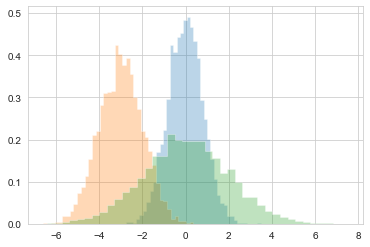

In [33]:
x1 = np.random.normal(0, 0.8, 5000)
x2 = np.random.normal(-3, 1, 5000)
x3 = np.random.normal(0, 2, 5000)

census_pd_povGender_Highest = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **census_pd_povGender_Highest)
plt.hist(x2, **census_pd_povGender_Highest)
plt.hist(x3, **census_pd_povGender_Highest);

In [34]:
census_pd_pbrZip.sample(25, random_state=100)

NameError: name 'census_pd_pbrZip' is not defined

In [35]:
census_data_povGender_Random = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_povGender_Random = pd.DataFrame(census_data_povGender_Random)



census_pd_povGender_Random = census_pd_povGender_Random.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Responses" })
census_pd_povGender_Random['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Random['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Random = census_pd_povGender_Random[[
"Zip Code",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
'Total Above poverty: Less than High School Graduate',
'Total Above poverty: High school graduate (includes equivalency)',
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher",
"Total Responses"
]]

census_pd_povGender_Random

,Zip Code,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher",Total Responses
0,98125,679.0,507.0,699.0,1112.0,1511.0,3832.0,6756.0,17845.0,44030.0
1,32073,529.0,545.0,1044.0,262.0,2037.0,7472.0,10526.0,7206.0,42153.0
2,07960,310.0,443.0,273.0,699.0,1413.0,4062.0,4054.0,20492.0,44998.0
3,29466,159.0,150.0,139.0,318.0,742.0,3984.0,6698.0,15964.0,41466.0
4,96720,507.0,1819.0,1054.0,843.0,1442.0,7331.0,9424.0,10422.0,48647.0
5,98391,249.0,585.0,281.0,187.0,1405.0,8266.0,13957.0,9201.0,52686.0
6,90804,1606.0,1044.0,1256.0,459.0,4460.0,3664.0,6089.0,7067.0,38151.0
7,27405,1728.0,2428.0,2318.0,637.0,3636.0,7374.0,7751.0,6698.0,51160.0
8,77901,1533.0,1826.0,843.0,198.0,4573.0,6707.0,6799.0,3233.0,42620.0
9,33604,1440.0,2099.0,1202.0,481.0,2933.0,8339.0,6982.0,5296.0,40309.0


In [36]:
# census_pd_povGender_Zip.sample(25, random_state=100)

In [37]:
census_data_Income_Highest = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Income_Highest = pd.DataFrame(census_data_Income_Highest)

census_pd_Income_Highest["Total below $50,000"] = (census_pd_Income_Highest["B19001_002E"]+census_pd_Income_Highest["B19001_003E"]+
census_pd_Income_Highest["B19001_004E"]+census_pd_Income_Highest["B19001_005E"]+
census_pd_Income_Highest["B19001_006E"]+census_pd_Income_Highest["B19001_007E"]+
census_pd_Income_Highest["B19001_008E"]+census_pd_Income_Highest["B19001_009E"]+
census_pd_Income_Highest["B19001_010E"])
census_pd_Income_Highest["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Highest["B19001_011E"]+census_pd_Income_Highest["B19001_012E"]+
census_pd_Income_Highest["B19001_013E"])
census_pd_Income_Highest["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Highest["B19001_014E"]+census_pd_Income_Highest["B19001_015E"])
census_pd_Income_Highest["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Highest["B19001_016E"]
census_pd_Income_Highest["Total above $\$$200,000"] =census_pd_Income_Highest["B19001_017E"]
census_pd_Income_Highest["Zip Code"] = census_pd_Income_Highest["zip code tabulation area"]
census_pd_Income_Highest["Total Responses"] = census_pd_Income_Highest["B01003_001E"]

census_pd_Income_Highest = census_pd_Income_Highest[[
"Zip Code",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Highest

,Zip Code,"Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,19104,11433.0,3189.0,1142.0,308.0,436.0
1,10027,10988.0,5311.0,3371.0,1509.0,2656.0
2,91103,3337.0,2029.0,1326.0,785.0,1008.0
3,60637,12916.0,4062.0,1632.0,559.0,953.0
4,90007,8045.0,2882.0,840.0,247.0,234.0
5,63130,4594.0,3098.0,1634.0,1031.0,1953.0
6,27701,5696.0,2336.0,1076.0,532.0,714.0
7,60201,5519.0,2917.0,2220.0,1065.0,3311.0
8,10458,17851.0,7939.0,1947.0,650.0,318.0
9,10012,2902.0,2675.0,2333.0,1060.0,3604.0


In [38]:
census_data_Income_Random = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Income_Random = pd.DataFrame(census_data_Income_Random)

census_pd_Income_Random["Total below $50,000"] = (census_pd_Income_Random["B19001_002E"]+census_pd_Income_Random["B19001_003E"]+
census_pd_Income_Random["B19001_004E"]+census_pd_Income_Random["B19001_005E"]+
census_pd_Income_Random["B19001_006E"]+census_pd_Income_Random["B19001_007E"]+
census_pd_Income_Random["B19001_008E"]+census_pd_Income_Random["B19001_009E"]+
census_pd_Income_Random["B19001_010E"])
census_pd_Income_Random["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Random["B19001_011E"]+census_pd_Income_Random["B19001_012E"]+
census_pd_Income_Random["B19001_013E"])
census_pd_Income_Random["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Random["B19001_014E"]+census_pd_Income_Random["B19001_015E"])
census_pd_Income_Random["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Random["B19001_016E"]
census_pd_Income_Random["Total above $\$$200,000"] =census_pd_Income_Random["B19001_017E"]
census_pd_Income_Random["Zip Code"] = census_pd_Income_Random["zip code tabulation area"]
census_pd_Income_Random["Total Responses"] = census_pd_Income_Random["B01003_001E"]

census_pd_Income_Random = census_pd_Income_Random[[
"Zip Code",
"Total Responses",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Random

,Zip Code,Total Responses,"Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,98125,44030.0,6180.0,5800.0,3450.0,1956.0,2257.0
1,32073,42153.0,5691.0,5440.0,2584.0,1052.0,327.0
2,07960,44998.0,3229.0,3484.0,2759.0,2443.0,5797.0
3,29466,41466.0,3412.0,2798.0,3132.0,1769.0,3521.0
4,96720,48647.0,6686.0,5338.0,2764.0,1477.0,836.0
5,98391,52686.0,2857.0,5504.0,4909.0,2425.0,2308.0
6,90804,38151.0,7022.0,4901.0,1981.0,618.0,505.0
7,27405,51160.0,12012.0,4883.0,1859.0,316.0,287.0
8,77901,42620.0,7849.0,4491.0,1593.0,427.0,224.0
9,33604,40309.0,8735.0,4847.0,1414.0,460.0,355.0


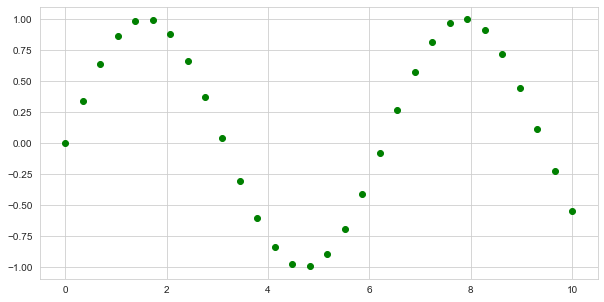

In [42]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.figure(figsize = (10,5))
plt.plot(x, y, 'o', color = 'Green');

In [43]:
Universities = {'University':['University of Chicago','Colombia University','Northwestern University','NYU','USC','University of Pennsylvania','Duke','Washington University','Fordham University','California Institute of Technology'],
                'Zip Code':[60637, 10027, 60201, 10012, 90007, 19104, 27701, 63130, 10458, 91103],
                'Lat':[41.780393, 40.812908, 42.056292, 40.725568, 34.02654, 39.964046, 35.995918, 38.665788, 40.864942, 34.167659],
                'Lng':[-87.596954, -73.953194, -87.701609, -73.998208, -118.282786, -75.197184, -78.902135, -90.32224, -73.884878, -118.169566]}
Universities_df = pd.DataFrame(Universities)
Universities_df.dtypes

Universities_df

,University,Zip Code,Lat,Lng
0,University of Chicago,60637,41.780393,-87.596954
1,Colombia University,10027,40.812908,-73.953194
2,Northwestern University,60201,42.056292,-87.701609
3,NYU,10012,40.725568,-73.998208
4,USC,90007,34.026540,-118.282786
5,University of Pennsylvania,19104,39.964046,-75.197184
6,Duke,27701,35.995918,-78.902135
7,Washington University,63130,38.665788,-90.322240
8,Fordham University,10458,40.864942,-73.884878
9,California Institute of Technology,91103,34.167659,-118.169566


In [47]:
census_data_Income_Random = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Income_Random = pd.DataFrame(census_data_Income_Random)

census_pd_Income_Random["Total below $50,000"] = (census_pd_Income_Random["B19001_002E"]+census_pd_Income_Random["B19001_003E"]+
census_pd_Income_Random["B19001_004E"]+census_pd_Income_Random["B19001_005E"]+
census_pd_Income_Random["B19001_006E"]+census_pd_Income_Random["B19001_007E"]+
census_pd_Income_Random["B19001_008E"]+census_pd_Income_Random["B19001_009E"]+
census_pd_Income_Random["B19001_010E"])
census_pd_Income_Random["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Random["B19001_011E"]+census_pd_Income_Random["B19001_012E"]+
census_pd_Income_Random["B19001_013E"])
census_pd_Income_Random["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Random["B19001_014E"]+census_pd_Income_Random["B19001_015E"])
census_pd_Income_Random["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Random["B19001_016E"]
census_pd_Income_Random["Total above $\$$200,000"] =census_pd_Income_Random["B19001_017E"]
census_pd_Income_Random["Zip Code"] = census_pd_Income_Random["zip code tabulation area"]
census_pd_Income_Random["Total Responses"] = census_pd_Income_Random["B01003_001E"]

census_pd_Income_Random = census_pd_Income_Random[[
"Zip Code",
"Total Responses",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Random

,Zip Code,Total Responses,"Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,98125,44030.0,6180.0,5800.0,3450.0,1956.0,2257.0
1,32073,42153.0,5691.0,5440.0,2584.0,1052.0,327.0
2,07960,44998.0,3229.0,3484.0,2759.0,2443.0,5797.0
3,29466,41466.0,3412.0,2798.0,3132.0,1769.0,3521.0
4,96720,48647.0,6686.0,5338.0,2764.0,1477.0,836.0
5,98391,52686.0,2857.0,5504.0,4909.0,2425.0,2308.0
6,90804,38151.0,7022.0,4901.0,1981.0,618.0,505.0
7,27405,51160.0,12012.0,4883.0,1859.0,316.0,287.0
8,77901,42620.0,7849.0,4491.0,1593.0,427.0,224.0
9,33604,40309.0,8735.0,4847.0,1414.0,460.0,355.0


In [46]:
print (census_pd_Income_Random["Total below $50,000"])
print(census_pd_Income_Random["Total Responses"])
print(census_pd_Income_Random["Total below $50,000"] / census_pd_Income_Random["Total Responses"])

0     6180.0
1     5691.0
2     3229.0
3     3412.0
4     6686.0
5     2857.0
6     7022.0
7    12012.0
8     7849.0
9     8735.0
Name: Total below $50,000, dtype: float64
0    44030.0
1    42153.0
2    44998.0
3    41466.0
4    48647.0
5    52686.0
6    38151.0
7    51160.0
8    42620.0
9    40309.0
Name: Total Responses, dtype: float64
0    0.140359
1    0.135008
2    0.071759
3    0.082284
4    0.137439
5    0.054227
6    0.184058
7    0.234793
8    0.184162
9    0.216701
dtype: float64


In [48]:
# Can't get Heat Map to work

highest_poverty=highest_merge['Total living in poverty'].max()



gmaps.configure(api_key=gkey)

highest_merge = highest_merge.dropna()
poverty = highest_merge["Total living in poverty"].astype(float)

location = highest_merge[["Lat", "Lng"]].astype(float)

fig = gmaps.figure(center = [0,0] ,zoom_level = 2)

heat_layer = gmaps.heatmap_layer(location, weights=poverty,
                               dissipating=False, max_intensity=highest_poverty,
                               point_radius = 4)
fig.add_layer(heat_layer)

fig

TypeError: list indices must be integers or slices, not str